# Bike sharing dataset
source:-https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# extracting day feature from dteday

In [7]:
df["day"]=pd.to_datetime(df.dteday).dt.day

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [9]:
df.drop("dteday",1,inplace=True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [10]:
# checking for null 

In [11]:
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [14]:
# instant feature is unique, so we drop it

In [13]:
df.drop("instant",1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [ ]:
# converting some features as object

In [15]:
df["season"]=df["season"].astype("object")
df["yr"]=df["yr"].astype("object")
df["mnth"]=df["mnth"].astype("object")
df["holiday"]=df["holiday"].astype("object")
df["weekday"]=df["weekday"].astype("object")
df["workingday"]=df["workingday"].astype("object")
df["weathersit"]=df["weathersit"].astype("object")
df["day"]=df["day"].astype("object")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    object 
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    object 
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    object 
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
 14  day         731 non-null    object 
dtypes: float64(4), int64(3), object(8)
memory usage: 85.8+ KB


# model building

In [28]:
from sklearn.model_selection import train_test_split
X=df.drop("cnt",1)
y=df["cnt"]
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [66]:
feat_num=["casual","registered"]
feat_cat=["season","yr","mnth","holiday","weekday","workingday","weathersit","day"]
data_pipeline = ColumnTransformer([
    ('numerical', MinMaxScaler(), feat_num),
    ('categorical', OneHotEncoder(drop="first"), feat_cat)
    ],remainder = 'passthrough')



Training_data=data_pipeline.fit_transform(X_train)

In [67]:
Training_data

<411x61 sparse matrix of type '<class 'numpy.float64'>'
	with 4541 stored elements in Compressed Sparse Row format>

In [68]:
Validation_data=data_pipeline.transform(X_valid)
Testing_data=data_pipeline.transform(X_test)

In [69]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, activation="relu", input_shape=Training_data.shape[1:]),
    
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="adam")


In [70]:
VALIDATION_SET = (Validation_data, y_valid)
history = model.fit(Training_data, y_train, epochs=1000,validation_data=VALIDATION_SET)

Train on 411 samples, validate on 137 samples
Epoch 1/1000
411/411 [==============================] - 0s 517us/sample - loss: 25475386.8954 - val_loss: 22057888.4380
Epoch 2/1000
411/411 [==============================] - 0s 77us/sample - loss: 25470935.6983 - val_loss: 22052310.8029
Epoch 3/1000
411/411 [==============================] - 0s 95us/sample - loss: 25462309.2603 - val_loss: 22041283.0073
Epoch 4/1000
411/411 [==============================] - 0s 73us/sample - loss: 25445576.4331 - val_loss: 22019482.3066
Epoch 5/1000
411/411 [==============================] - 0s 78us/sample - loss: 25411832.6423 - val_loss: 21977751.3285
Epoch 6/1000
411/411 [==============================] - 0s 80us/sample - loss: 25348621.9562 - val_loss: 21900677.4161
Epoch 7/1000
411/411 [==============================] - 0s 80us/sample - loss: 25236813.5377 - val_loss: 21766854.1460
Epoch 8/1000
411/411 [==============================] - 0s 75us/sample - loss: 25045453.7032 - val_loss: 21549428.3212
E

411/411 [==============================] - 0s 112us/sample - loss: 580185.1829 - val_loss: 966202.2128
Epoch 69/1000
411/411 [==============================] - 0s 107us/sample - loss: 567138.7860 - val_loss: 949606.7051
Epoch 70/1000
411/411 [==============================] - 0s 101us/sample - loss: 554557.9235 - val_loss: 932256.0029
Epoch 71/1000
411/411 [==============================] - 0s 102us/sample - loss: 543115.0017 - val_loss: 914224.0068
Epoch 72/1000
411/411 [==============================] - 0s 105us/sample - loss: 532535.7988 - val_loss: 902158.6214
Epoch 73/1000
411/411 [==============================] - 0s 112us/sample - loss: 520794.0519 - val_loss: 878215.4450
Epoch 74/1000
411/411 [==============================] - 0s 104us/sample - loss: 509954.5116 - val_loss: 861887.0776
Epoch 75/1000
411/411 [==============================] - ETA: 0s - loss: 347890.06 - 0s 100us/sample - loss: 499850.8442 - val_loss: 847921.7409
Epoch 76/1000
411/411 [===========================

411/411 [==============================] - 0s 95us/sample - loss: 252897.0534 - val_loss: 373539.3887
Epoch 138/1000
411/411 [==============================] - 0s 112us/sample - loss: 250555.0472 - val_loss: 371420.7274
Epoch 139/1000
411/411 [==============================] - 0s 114us/sample - loss: 248909.9708 - val_loss: 368005.9433
Epoch 140/1000
411/411 [==============================] - 0s 104us/sample - loss: 247309.5116 - val_loss: 364424.9352
Epoch 141/1000
411/411 [==============================] - 0s 104us/sample - loss: 245999.5130 - val_loss: 362210.5598
Epoch 142/1000
411/411 [==============================] - 0s 104us/sample - loss: 244181.1813 - val_loss: 358688.4498
Epoch 143/1000
411/411 [==============================] - 0s 106us/sample - loss: 242581.2477 - val_loss: 355160.0862
Epoch 144/1000
411/411 [==============================] - 0s 99us/sample - loss: 242256.0100 - val_loss: 354072.7418
Epoch 145/1000
411/411 [==============================] - 0s 106us/sample

411/411 [==============================] - 0s 111us/sample - loss: 161013.6467 - val_loss: 217918.2099
Epoch 207/1000
411/411 [==============================] - 0s 107us/sample - loss: 159945.2231 - val_loss: 216429.0203
Epoch 208/1000
411/411 [==============================] - 0s 107us/sample - loss: 158933.6083 - val_loss: 214189.9954
Epoch 209/1000
411/411 [==============================] - 0s 101us/sample - loss: 158322.3429 - val_loss: 213524.1146
Epoch 210/1000
411/411 [==============================] - 0s 107us/sample - loss: 156928.2753 - val_loss: 211239.3609
Epoch 211/1000
411/411 [==============================] - 0s 105us/sample - loss: 155757.7616 - val_loss: 210092.8646
Epoch 212/1000
411/411 [==============================] - 0s 102us/sample - loss: 154532.3642 - val_loss: 207735.3433
Epoch 213/1000
411/411 [==============================] - 0s 103us/sample - loss: 153898.2103 - val_loss: 206432.2676
Epoch 214/1000
411/411 [==============================] - 0s 104us/samp

411/411 [==============================] - 0s 104us/sample - loss: 91993.6200 - val_loss: 120684.3892
Epoch 276/1000
411/411 [==============================] - 0s 108us/sample - loss: 91366.4346 - val_loss: 119670.1440
Epoch 277/1000
411/411 [==============================] - 0s 112us/sample - loss: 91022.7993 - val_loss: 118221.0729
Epoch 278/1000
411/411 [==============================] - 0s 104us/sample - loss: 89462.9538 - val_loss: 117176.0583
Epoch 279/1000
411/411 [==============================] - 0s 102us/sample - loss: 88652.2096 - val_loss: 115666.2912
Epoch 280/1000
411/411 [==============================] - 0s 100us/sample - loss: 87821.6162 - val_loss: 114784.9871
Epoch 281/1000
411/411 [==============================] - 0s 102us/sample - loss: 86720.1984 - val_loss: 113712.8532
Epoch 282/1000
411/411 [==============================] - 0s 102us/sample - loss: 87075.1950 - val_loss: 112600.5766
Epoch 283/1000
411/411 [==============================] - 0s 119us/sample - los

411/411 [==============================] - 0s 102us/sample - loss: 39832.9589 - val_loss: 52462.3468
Epoch 346/1000
411/411 [==============================] - 0s 113us/sample - loss: 39454.8229 - val_loss: 52206.2474
Epoch 347/1000
411/411 [==============================] - 0s 104us/sample - loss: 38523.6043 - val_loss: 50934.5004
Epoch 348/1000
411/411 [==============================] - 0s 103us/sample - loss: 37969.0553 - val_loss: 50613.0101
Epoch 349/1000
411/411 [==============================] - 0s 104us/sample - loss: 37674.4207 - val_loss: 49451.1058
Epoch 350/1000
411/411 [==============================] - 0s 104us/sample - loss: 36981.5431 - val_loss: 48682.5758
Epoch 351/1000
411/411 [==============================] - 0s 97us/sample - loss: 36415.1660 - val_loss: 48328.7701
Epoch 352/1000
411/411 [==============================] - 0s 104us/sample - loss: 36178.5184 - val_loss: 47255.7772
Epoch 353/1000
411/411 [==============================] - 0s 104us/sample - loss: 35196.

411/411 [==============================] - 0s 102us/sample - loss: 9770.3976 - val_loss: 15038.0022
Epoch 416/1000
411/411 [==============================] - 0s 105us/sample - loss: 9702.8868 - val_loss: 15173.6499
Epoch 417/1000
411/411 [==============================] - 0s 104us/sample - loss: 9423.2530 - val_loss: 14607.8898
Epoch 418/1000
411/411 [==============================] - 0s 101us/sample - loss: 9302.3776 - val_loss: 14250.3721
Epoch 419/1000
411/411 [==============================] - 0s 99us/sample - loss: 9144.2308 - val_loss: 14155.3762
Epoch 420/1000
411/411 [==============================] - 0s 100us/sample - loss: 8694.7447 - val_loss: 13731.9005
Epoch 421/1000
411/411 [==============================] - 0s 104us/sample - loss: 8533.3683 - val_loss: 13846.9466
Epoch 422/1000
411/411 [==============================] - 0s 107us/sample - loss: 8445.7820 - val_loss: 13448.6869
Epoch 423/1000
411/411 [==============================] - 0s 102us/sample - loss: 8165.2187 - va

Epoch 487/1000
411/411 [==============================] - 0s 102us/sample - loss: 1924.2412 - val_loss: 5320.7412
Epoch 488/1000
411/411 [==============================] - 0s 107us/sample - loss: 1878.5550 - val_loss: 5116.0561
Epoch 489/1000
411/411 [==============================] - 0s 112us/sample - loss: 1840.0883 - val_loss: 5100.0702
Epoch 490/1000
411/411 [==============================] - 0s 106us/sample - loss: 1811.6595 - val_loss: 5046.3302
Epoch 491/1000
411/411 [==============================] - 0s 109us/sample - loss: 1759.0272 - val_loss: 4951.8368
Epoch 492/1000
411/411 [==============================] - 0s 106us/sample - loss: 1717.1621 - val_loss: 4984.2966
Epoch 493/1000
411/411 [==============================] - 0s 104us/sample - loss: 1679.6888 - val_loss: 4908.5273
Epoch 494/1000
411/411 [==============================] - 0s 158us/sample - loss: 1652.0155 - val_loss: 4850.8220
Epoch 495/1000
411/411 [==============================] - 0s 104us/sample - loss: 1618.9

411/411 [==============================] - 0s 105us/sample - loss: 480.7249 - val_loss: 2794.0675
Epoch 560/1000
411/411 [==============================] - 0s 111us/sample - loss: 482.9117 - val_loss: 2754.9060
Epoch 561/1000
411/411 [==============================] - 0s 108us/sample - loss: 465.0730 - val_loss: 2713.5977
Epoch 562/1000
411/411 [==============================] - 0s 104us/sample - loss: 450.7070 - val_loss: 2713.0645
Epoch 563/1000
411/411 [==============================] - 0s 104us/sample - loss: 443.2624 - val_loss: 2700.9922
Epoch 564/1000
411/411 [==============================] - 0s 104us/sample - loss: 441.2591 - val_loss: 2718.7304
Epoch 565/1000
411/411 [==============================] - 0s 102us/sample - loss: 468.0264 - val_loss: 2686.8387
Epoch 566/1000
411/411 [==============================] - 0s 103us/sample - loss: 422.9152 - val_loss: 2639.9602
Epoch 567/1000
411/411 [==============================] - 0s 104us/sample - loss: 422.0900 - val_loss: 2630.679

411/411 [==============================] - 0s 107us/sample - loss: 109.7916 - val_loss: 1817.5311
Epoch 632/1000
411/411 [==============================] - 0s 105us/sample - loss: 115.2183 - val_loss: 1801.7198
Epoch 633/1000
411/411 [==============================] - 0s 114us/sample - loss: 110.8289 - val_loss: 1767.3190
Epoch 634/1000
411/411 [==============================] - 0s 100us/sample - loss: 119.5061 - val_loss: 1791.2894
Epoch 635/1000
411/411 [==============================] - 0s 102us/sample - loss: 105.2653 - val_loss: 1783.3759
Epoch 636/1000
411/411 [==============================] - 0s 101us/sample - loss: 98.0696 - val_loss: 1767.6866
Epoch 637/1000
411/411 [==============================] - 0s 102us/sample - loss: 97.3757 - val_loss: 1747.6564
Epoch 638/1000
411/411 [==============================] - 0s 103us/sample - loss: 91.8043 - val_loss: 1758.7523
Epoch 639/1000
411/411 [==============================] - 0s 112us/sample - loss: 91.7520 - val_loss: 1745.0936
Ep

411/411 [==============================] - 0s 119us/sample - loss: 20.9451 - val_loss: 1451.2449
Epoch 705/1000
411/411 [==============================] - 0s 114us/sample - loss: 19.6398 - val_loss: 1445.8354
Epoch 706/1000
411/411 [==============================] - 0s 120us/sample - loss: 18.9882 - val_loss: 1467.8316
Epoch 707/1000
411/411 [==============================] - 0s 114us/sample - loss: 18.7326 - val_loss: 1449.2458
Epoch 708/1000
411/411 [==============================] - 0s 112us/sample - loss: 18.8112 - val_loss: 1415.5409
Epoch 709/1000
411/411 [==============================] - 0s 107us/sample - loss: 18.2938 - val_loss: 1425.5440
Epoch 710/1000
411/411 [==============================] - 0s 106us/sample - loss: 16.2365 - val_loss: 1432.1387
Epoch 711/1000
411/411 [==============================] - 0s 107us/sample - loss: 16.3984 - val_loss: 1431.5422
Epoch 712/1000
411/411 [==============================] - 0s 114us/sample - loss: 15.6053 - val_loss: 1419.9641
Epoch 7

411/411 [==============================] - 0s 114us/sample - loss: 5.7133 - val_loss: 1262.2293
Epoch 778/1000
411/411 [==============================] - 0s 112us/sample - loss: 5.0142 - val_loss: 1266.7214
Epoch 779/1000
411/411 [==============================] - 0s 105us/sample - loss: 5.3042 - val_loss: 1266.3822
Epoch 780/1000
411/411 [==============================] - 0s 102us/sample - loss: 5.5220 - val_loss: 1269.5423
Epoch 781/1000
411/411 [==============================] - 0s 109us/sample - loss: 4.9348 - val_loss: 1264.3713
Epoch 782/1000
411/411 [==============================] - ETA: 0s - loss: 2.636 - 0s 100us/sample - loss: 4.4751 - val_loss: 1268.9206
Epoch 783/1000
411/411 [==============================] - 0s 104us/sample - loss: 4.4540 - val_loss: 1262.7643
Epoch 784/1000
411/411 [==============================] - 0s 107us/sample - loss: 4.6109 - val_loss: 1251.9396
Epoch 785/1000
411/411 [==============================] - 0s 119us/sample - loss: 5.0444 - val_loss: 12

Epoch 851/1000
411/411 [==============================] - 0s 114us/sample - loss: 2.4427 - val_loss: 1195.0381
Epoch 852/1000
411/411 [==============================] - 0s 115us/sample - loss: 2.5730 - val_loss: 1199.7556
Epoch 853/1000
411/411 [==============================] - 0s 114us/sample - loss: 3.1418 - val_loss: 1188.8785
Epoch 854/1000
411/411 [==============================] - 0s 110us/sample - loss: 2.8635 - val_loss: 1179.8825
Epoch 855/1000
411/411 [==============================] - 0s 107us/sample - loss: 2.8174 - val_loss: 1178.6786
Epoch 856/1000
411/411 [==============================] - 0s 110us/sample - loss: 2.6813 - val_loss: 1179.5271
Epoch 857/1000
411/411 [==============================] - 0s 117us/sample - loss: 2.9646 - val_loss: 1200.7903
Epoch 858/1000
411/411 [==============================] - 0s 112us/sample - loss: 3.2811 - val_loss: 1204.4161
Epoch 859/1000
411/411 [==============================] - 0s 107us/sample - loss: 3.8420 - val_loss: 1196.3733
E

Epoch 925/1000
411/411 [==============================] - 0s 112us/sample - loss: 3.3983 - val_loss: 1140.6807
Epoch 926/1000
411/411 [==============================] - 0s 110us/sample - loss: 4.5375 - val_loss: 1165.0354
Epoch 927/1000
411/411 [==============================] - 0s 114us/sample - loss: 3.3225 - val_loss: 1149.4711
Epoch 928/1000
411/411 [==============================] - 0s 116us/sample - loss: 4.8108 - val_loss: 1149.6914
Epoch 929/1000
411/411 [==============================] - 0s 114us/sample - loss: 9.9011 - val_loss: 1208.6021
Epoch 930/1000
411/411 [==============================] - 0s 104us/sample - loss: 17.8814 - val_loss: 1164.8958
Epoch 931/1000
411/411 [==============================] - 0s 104us/sample - loss: 16.0246 - val_loss: 1193.4621
Epoch 932/1000
411/411 [==============================] - 0s 116us/sample - loss: 38.5703 - val_loss: 1224.0107
Epoch 933/1000
411/411 [==============================] - 0s 112us/sample - loss: 45.6370 - val_loss: 1115.71

411/411 [==============================] - 0s 120us/sample - loss: 19.2223 - val_loss: 1149.7537
Epoch 999/1000
411/411 [==============================] - 0s 112us/sample - loss: 24.2380 - val_loss: 1200.0213
Epoch 1000/1000
411/411 [==============================] - 0s 112us/sample - loss: 67.4799 - val_loss: 1066.3164


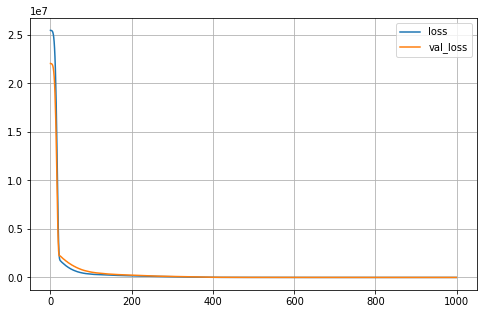

In [71]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [72]:
#mse_test = model.evaluate(Testing_data, y_test)
y_pred = model.predict(Testing_data)

In [73]:
#converting to 1_d array
y_pred=np.squeeze(y_pred)

In [74]:
# rmse of test data
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

37.13168552726431

In [75]:
# rmse of train data
y_pred_train=np.squeeze(model.predict(Training_data))
mean_squared_error(y_train,y_pred_train,squared=False)

6.381996547408347